# Анализ архивных данных сервиса Яндекс.Недвижимость в Санкт-Петербурге и соседних населённых пунктах

## Цель проекта
Установка параметров влияющие на рыночную стоимость объектов недвижимости для построения автоматизированной системы, отслеживающей аномалии и мошенническую деятельность.


## План работ:
- Знакомство с данными
- Предобработка
- Генерация недостающих для анализа сущностей
- Исследовательский анализ данных

Описание переменных
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* 		balcony — число балконов
* 		ceiling_height — высота потолков (м)
* 		cityCenters_nearest — расстояние до центра города (м)
* 		days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* 		first_day_exposition — дата публикации
* 		floor — этаж
* 		floors_total — всего этажей в доме
* 		is_apartment — апартаменты (булев тип)
* 		kitchen_area — площадь кухни в квадратных метрах (м²)
* 		last_price — цена на момент снятия с публикации
* 		living_area — жилая площадь в квадратных метрах(м²)
* 		locality_name — название населённого пункта
* 		open_plan — свободная планировка (булев тип)
* 		parks_around3000 — число парков в радиусе 3 км
* 		parks_nearest — расстояние до ближайшего парка (м)
* 		ponds_around3000 — число водоёмов в радиусе 3 км
* 		ponds_nearest — расстояние до ближайшего водоёма (м)
* 		rooms — число комнат
* 		studio — квартира-студия (булев тип)
* 		total_area — площадь квартиры в квадратных метрах (м²)
* 		total_images — число фотографий квартиры в объявлении


## 1. Предварительное знакомство с данными

Импортируем необходимые для работы библиотеки:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Импортируем данные

In [2]:
estate_data=pd.read_csv('./datasets/real_estate_data.csv',sep='\t')

Получим размерность данных (shape), общую информацию(метод info()) и выведем 5 случайных записей (метод sample())

In [3]:
estate_data.shape

(23699, 22)

In [4]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
,total_images           23699 non-null object
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around30

In [5]:
estate_data.sample(5)

,",total_images",last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3599,"3599,13",10500000.0,80.0,2018-12-17T00:00:00,3,2.6,17.0,47.8,6,NaN,...,10.0,NaN,Санкт-Петербург,50988.0,15018.0,0.0,NaN,0.0,NaN,NaN
3525,"3525,12",10700000.0,115.0,2016-06-08T00:00:00,3,3.2,5.0,67.0,4,False,...,18.0,1.0,Санкт-Петербург,31363.0,3855.0,1.0,266.0,1.0,892.0,199.0
6914,"6914,3",4700000.0,54.0,2016-02-24T00:00:00,2,NaN,17.0,35.0,8,NaN,...,9.0,0.0,Санкт-Петербург,50850.0,16178.0,0.0,NaN,0.0,NaN,113.0
13697,"13697,8",2855000.0,45.4,2018-03-01T00:00:00,1,NaN,6.0,18.6,3,NaN,...,12.0,NaN,Отрадное,NaN,NaN,NaN,NaN,NaN,NaN,254.0
19413,"19413,6",6000000.0,69.0,2017-07-31T00:00:00,3,NaN,9.0,40.0,4,NaN,...,8.0,0.0,Пушкин,13015.0,25168.0,0.0,NaN,0.0,NaN,92.0


Ознакомимся со статистическими параметрами количественных переменных


In [6]:
estate_data.describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Определим % отсутствующих значений в каждой колонке

In [7]:
total=estate_data.isnull().sum()
percent=(estate_data.isnull().sum()/estate_data.isnull().count())*100
missing_data=pd.concat([total,percent],axis=1, keys=['Total','Percent']).sort_values(by='Total',ascending=False)
missing_data

,Total,Percent
is_apartment,20924,88.290645
parks_nearest,15620,65.909954
ponds_nearest,14589,61.559559
balcony,11519,48.605426
ceiling_height,9195,38.799105
airports_nearest,5542,23.384953
cityCenters_nearest,5519,23.287902
ponds_around3000,5518,23.283683
parks_around3000,5518,23.283683
days_exposition,3181,13.422507


Посмотрим есть ли дубликаты:

In [8]:
estate_data.duplicated().sum()

0

#### Выводы:
- Имеются данные по 23699 объектам недвижимости, каждый из которых описывается 22 признаками (17 количественных, 4 категориальных и 1 дата/время). 
- Для части признаков неверно задан тип данных или  не совпадает с указанным в описании переменных. 
- Некоторые  признаки содержат пропущенные значения и аномальные значения.
- Отсутствуют дубликаты
- Ориентируясь на медианные значения таких параметров, как площадь кухни и общая площадь, можно предположить что большая часть предложений относится к объектам типовой застройки

## 2. Предобработка данных

#### Обработка пропущенных значений для переменных нужных для последующего анализа

Является ли объект недвижимости апартаментами

Пропущено 88% значений. Можно предположить, что владелец не указывал эту информацию для некоммерческой недвижимости.

In [9]:
estate_data['is_apartment'] = estate_data['is_apartment'].fillna(False)
estate_data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Количество этажей в доме

пропущено~0,4% значений

Признак нужен для последующего анализа, адекватно заполнение не представляется возможным 

In [10]:
estate_data.dropna(subset=['floors_total'], inplace=True)
estate_data.shape

(23613, 22)

Название населенного пункта

~0,2% пропущенных значений

In [11]:
estate_data.dropna(subset=['locality_name'], inplace=True)
estate_data.shape

(23565, 22)

приведем все названия населенного пункта к нижнему регистру и оценим количество уникальных:

In [12]:
estate_data['locality_name'] = estate_data['locality_name'].str.lower()   
estate_data['locality_name'].value_counts()

санкт-петербург               15651
посёлок мурино                  520
посёлок шушары                  439
всеволожск                      398
пушкин                          369
                              ...  
садовое товарищество садко        1
поселок севастьяново              1
деревня курковицы                 1
деревня кривко                    1
поселок усть-луга                 1
Name: locality_name, Length: 364, dtype: int64

тип поселения-поселок заполнен с "ё" и "е". удалим разночтение заменив все ё на е

In [13]:
estate_data['locality_name'] = estate_data['locality_name'].str.replace('ё', 'е', regex=True)

In [14]:
estate_data['locality_name'].unique().shape

(330,)

Расстояние до центра города: пропущено 23,3% значений
узнаем сколько значений пропущено непосредственно для СПб

In [15]:
empty=len(estate_data[(estate_data['locality_name'] == 'санкт-петербург') & (estate_data['cityCenters_nearest'].isna())])
total=len(estate_data.loc[(estate_data['locality_name'] == 'санкт-петербург')])
print(f"процент отсутствующих записей {empty/total* 100 :.2f}%")
print("такой % отсутствующих значений не должен существенно повлиять на результат")

процент отсутствующих записей 0.38%
такой % отсутствующих значений не должен существенно повлиять на результат


количество балконов

пропущено ~50% значений. Скорее всего данные не вносились по причине отсутствия балкона.


Отсутствующие значения заполним 0 и проверим:

In [16]:
estate_data['balcony'].fillna(0, inplace=True)
estate_data['balcony'].isna().value_counts()

False    23565
Name: balcony, dtype: int64

Высота потолков

~40% пропущеных значений

при среднем значении в нашем датасете 2,77м и медиане 2,65

можно допустить  преобладание предложений о продаже в домах типовой застройки

пропущенные данные логично заменить средним значением:

In [17]:
ceiling_height_mean = estate_data['ceiling_height'].mean()
estate_data['ceiling_height'].fillna(value = ceiling_height_mean, inplace = True)
estate_data['ceiling_height'].isna().value_counts()

False    23565
Name: ceiling_height, dtype: int64

Площадь кухни
~10% пропущено

В рамках сделанного ранее предположения о преобладании типовых квартир

пропущенные данные логично заменить медианным значением для домов аналогичной этажности

In [18]:
kitchen_area_median=estate_data.pivot_table(index='floors_total', values='kitchen_area'
                                                , aggfunc=['median', 'count'])
kitchen_area_median.columns = ['median', 'count']
kitchen_area_median

,median,count
floors_total,,
1.0,9.10,19
2.0,7.00,347
3.0,8.50,592
4.0,9.80,1073
5.0,7.00,5250
6.0,11.00,845
7.0,10.70,546
8.0,12.55,356
9.0,7.60,3504


In [19]:
for floor in kitchen_area_median.index:
    estate_data.loc[(estate_data['kitchen_area'].isna()) & 
             (estate_data['floors_total'] == floor), 
             'kitchen_area'] = kitchen_area_median.loc[floor, 'median']
estate_data['kitchen_area'].isna().value_counts()

False    23564
True         1
Name: kitchen_area, dtype: int64

Один пропуск не заполнился:

In [20]:
estate_data.query('floors_total==34')

,",total_images",last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1697,"1697,11",3550000.0,28.0,2018-02-08T00:00:00,1,2.65,34.0,18.0,23,False,...,NaN,0.0,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,410.0


34 этажный дом представлен одной записью в базе. Площадь кухни отсутствует, медианное значение не вычислилось.
Подставим разницу между общей и жилой площадью.

In [21]:
estate_data['kitchen_area'].fillna(value = estate_data['total_area'] - estate_data['living_area'],inplace = True)
estate_data.query('floors_total==34')


,",total_images",last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1697,"1697,11",3550000.0,28.0,2018-02-08T00:00:00,1,2.65,34.0,18.0,23,False,...,10.0,0.0,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,410.0


в квартирах студиях кухня составляет единое целое с комнатой,

следовательно площадь кухни = 0

In [22]:
estate_data.loc[estate_data['studio']==True, 'kitchen_area']=0
estate_data['kitchen_area'].isna().value_counts()

False    23565
Name: kitchen_area, dtype: int64

длительность размещения объявления
~13% пропущенных значений. Заменим на медиану

In [23]:
days_exp=estate_data['days_exposition'].median()
estate_data.loc[estate_data['days_exposition'].isna(), 'days_exposition'] = days_exp
estate_data['days_exposition'].isna().value_counts()

False    23565
Name: days_exposition, dtype: int64

Жилая площадь

пропущено ~8% значений

недостающие данные могут быть оценены как разница между общей площадью и площадью кухни

In [24]:
estate_data.loc[(pd.isnull(estate_data['living_area'])), 'living_area'] = estate_data['total_area'] - estate_data['kitchen_area']

estate_data['living_area'].isna().value_counts()

False    23565
Name: living_area, dtype: int64

#### Изменение типа данных
дата публикации -изменим тип на дата/время


In [25]:
estate_data['first_day_exposition'] = pd.to_datetime(estate_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print("Дата первого объявления:",estate_data['first_day_exposition'].min())
print("Дата последнего объявления",estate_data['first_day_exposition'].max())

Дата первого объявления: 2014-11-27 00:00:00
Дата последнего объявления 2019-05-03 00:00:00


Изменим тип данных на целочисленный там где это необходимо:

In [26]:
estate_data['last_price']=estate_data['last_price'].astype(int)
estate_data['floors_total'] = estate_data['floors_total'].astype('int')
estate_data['balcony'] = estate_data['balcony'].astype('int')
estate_data['days_exposition'] = estate_data['days_exposition'].astype('int')
estate_data['rooms'] = estate_data['rooms'].astype('int')

In [27]:
estate_data.dtypes

,total_images                   object
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                  int64
dtype: object

#### Выводы:
Обработка пропусков:

- Высота потолков: было пропущено 38,8% значений Все пропущенные значения обработаны заменщй на среднее.
- Число этажей в доме: пропущено 0,4% значений. Переменная будет использоваться в анализе, при этом достаточно точно  строки с пропущенными значениями удалены.
- Площадь кухни: пропущено 9,4% значений заполнение недостающих данных произведено медианным значением для домов аналогичной этажности.
- Число балконов: пропущено 48,6% значений. Пропуск приравняли к отсутствию балкона.
- Название населенного пункта: пропущено 0,2% значений. Все строки с пропущенными значениями удалены, так как этот признак будет использоваться при дальнейшем анализе.
- Расстояние до центра города: пропущено 23,3% значений. При этом для квартир Санкт-Петербурга, а именно они нам потребуются для анализа, отсутствуют данные по расстоянию до центра для 0,4% квартир. Оставляем данные без изменений.
- Длительность размещения объявления: пропущено 13,5% значений. Все пропущенные значения были заменены на медиану.

Причины возникновения пропусков:
- для данных по квартирам это прежде всего человеческий фактор и возможно некорректно организованные формы ввода информации. По возможности, все поля ввода парметров квартиры надо сделать обязательными.
- для геоданных - часть данных просто не была приведена в  соответствие с адресом недвижимости

Изменение типов данных:

- Цену на момент снятия с публикации меняем на целочисленное , так как числа достаточно большие и можно принебречь значением после запятой
- Количество этажей,количество балконов, количество комнат не могут быть вещественными - изменены на целые
- Время публикации записано некорректно, в столбце first_day_exposition-тип данных изменен на datetime



# 3. Добавление данных

#### День недели, месяц и год публикации объявления:

In [28]:
estate_data['weekday'] = estate_data['first_day_exposition'].dt.weekday
estate_data['month'] = estate_data['first_day_exposition'].dt.month
estate_data['year'] = estate_data['first_day_exposition'].dt.year

#### Этаж квартиры (первый, последний, другой)

определим и применим функцию для указания этажа:


In [29]:
def floor(data):
    if data['floor'] == 1:
        return 'первый'
    elif data['floor'] == data['floors_total']:
        return 'последний'
    else:
        return 'другой'
        
estate_data['floor_type'] = estate_data.apply(floor, axis=1)

Цена квадратного метра:

In [30]:
estate_data['sqm_price'] = round(estate_data['last_price'] / estate_data['total_area'], 1)

Соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [31]:
estate_data['living_area_ratio'] = round(estate_data['living_area'] / estate_data['total_area'], 2)
estate_data['kitchen_area_ratio'] = round(estate_data['kitchen_area'] / estate_data['total_area'], 2)

In [32]:
estate_data.sample()

,",total_images",last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,floor_type,sqm_price,living_area_ratio,kitchen_area_ratio
9872,"9872,7",4890000,48.0,2017-07-12,2,2.771283,9,28.0,2,False,...,0.0,NaN,35,2,7,2017,другой,101875.0,0.58,0.17


#### Выводы:

- были посчитаны и добавлены в таблицу новые величины (цена квадратного метра, день недели, месяц и год публикации объявления, соотношение жилой и общей площади, а также отношение площади кухни к общей),
- добавлена категориальная переменная характеризующая местоположение квартиры в доме - тип этажа(первый, последний, другой),
- было рассчитано соотношение жилой и общей площади, а также отношение площади кухни к общей

# 4. Исследовательский анализ данных

#### Изучите следующие параметры: 
- площадь
- цена
- число комнат 
- высота потолков.

Постройте гистограммы для каждого параметра.


Получим основные статистические параметры и построим гистограммы и диаграммы размаха для исследуемых переменных:

In [33]:
estate_data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23565.000000,2.356500e+04,23565.000000,23565.000000
mean,60.322824,6.540058e+06,2.070656,2.771283
std,35.657060,1.091093e+07,1.078591,0.989266
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.646000e+06,2.000000,2.771283
75%,69.700000,6.790000e+06,3.000000,2.771283
max,900.000000,7.630000e+08,19.000000,100.000000


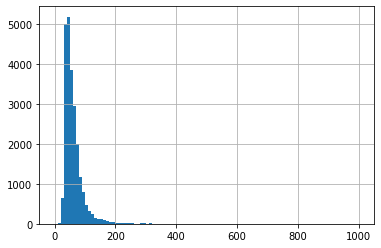

(0, 600)

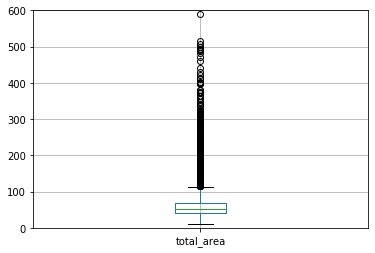

In [34]:
estate_data['total_area'].hist(bins=100,range=(0,1000))
plt.show()
estate_data.boxplot(column = ['total_area'])
plt.ylim(0, 600)

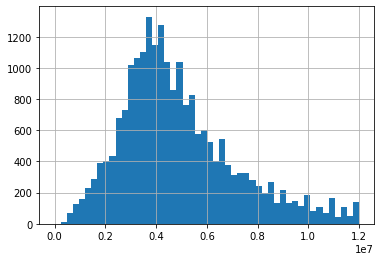

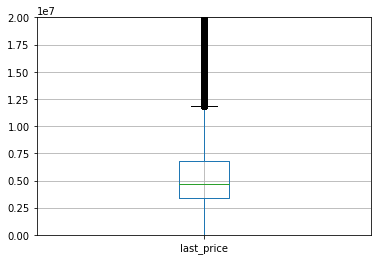

In [35]:
estate_data['last_price'].hist(bins = 50, range = (0, 12000000))
plt.show()
estate_data.boxplot(column = ['last_price'])
plt.ylim(0, 20000000)
plt.show()

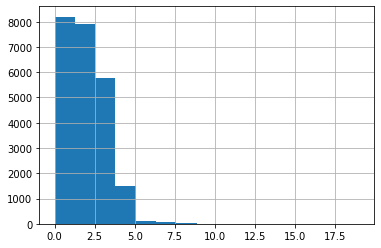

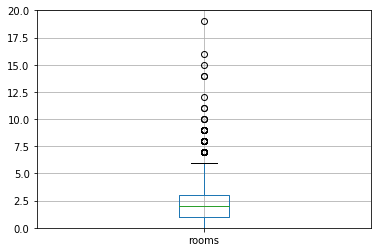

In [36]:
estate_data['rooms'].hist(bins=15)
plt.show()
estate_data.boxplot(column = ['rooms'])
plt.ylim(0, 20)
plt.show()

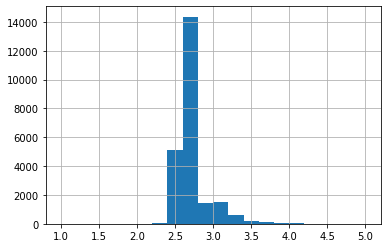

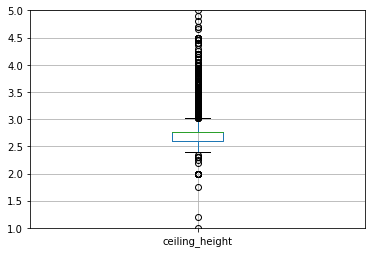

In [37]:
estate_data['ceiling_height'].hist(bins = 20, range = (1, 5))
plt.show()
estate_data.boxplot(column = ['ceiling_height'])
plt.ylim(1, 5)
plt.show()

Сразу бросается в глаза наличие аномально больших и маленьких значений:
- площадь в 900 м2
- высота потолка в 1 метр и 100 метров
- 19 комнат

Очевидно, что большая часть таких значений приходится на ошибки ввода, меньшая на реальные артефакты.

Однако их наличие дает несколько искаженную картину.

При этом большинство записей имеют вполне разумные значения.
Типовые(средние)показатели для выставленных квартир:
- двухкомнатная квартира 
- с потолком 2.7, 
- площадью 60м2,
- ценой порядка 6,5млн

Для получения более точных характеристик типовой квартиры удалим аномальные значения.
Оставим в выборке лишь значения укладывающиеся в интерквартильный размах. 

Определим функцию для удаления аномалий и применим ее к нашим данным:

In [38]:
def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 
    low_lim  = q1-1.5*iqr
    high_lim = q3+1.5*iqr
    df.drop(df[df[col_name] < low_lim].index, inplace = True)
    df.drop(df[df[col_name] > high_lim].index, inplace = True)
    
    return df

In [39]:
remove_outliers(estate_data,'total_area')
remove_outliers(estate_data, 'last_price')
remove_outliers(estate_data, 'rooms')
remove_outliers(estate_data, 'ceiling_height')
estate_data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,20162.000000,2.016200e+04,20162.000000,20162.000000
mean,51.432694,4.605053e+06,1.878683,2.693003
std,16.803055,1.978954e+06,0.874248,0.127096
min,12.000000,1.219000e+04,0.000000,2.400000
25%,38.300000,3.250000e+06,1.000000,2.580000
50%,47.800000,4.300000e+06,2.000000,2.771283
75%,61.700000,5.700000e+06,3.000000,2.771283
max,114.200000,1.070000e+07,6.000000,3.020000


после удаление аномалий типовые параметры продаваемой недвижимости немного изменились:
- цена(существенно)4,6млн
- площадь 51м2
- комнаты 2
- высота потолка 2,7м

#### Какие факторы больше всего влияют на стоимость квартиры?

Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [40]:
estate_prop=estate_data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116d1ba10>,
      dtype=object)

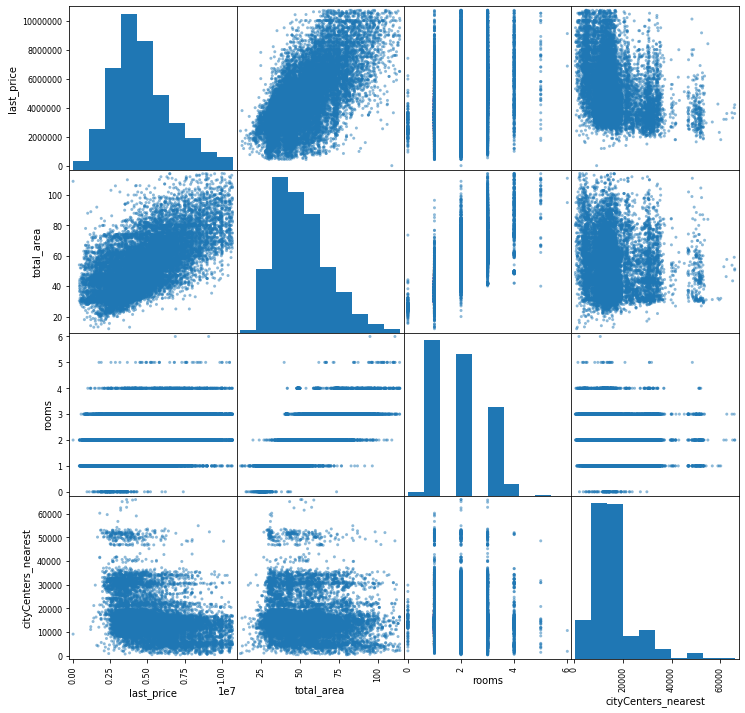

In [41]:
pd.plotting.scatter_matrix(estate_prop, figsize=(12, 12))

In [42]:

round(estate_prop.corr()[['last_price']].sort_values('last_price',ascending=False)[1:],2)


,last_price
total_area,0.67
rooms,0.41
cityCenters_nearest,-0.31


Из значений коэффициентов корреляции следует, что  цена сильно зависит от общей площади и числа комнат(число комнат тоже связано с общей площадью), присутствует отрицательная зависимость цены от расстояния до центра города. Чем дальше, тем дешевле

Анализ зависимости цены за м2 от типа этажа, дня недели,месяца,и года проведем с помощью столбчатых диаграмм

Попробуем построить сразу все графики:


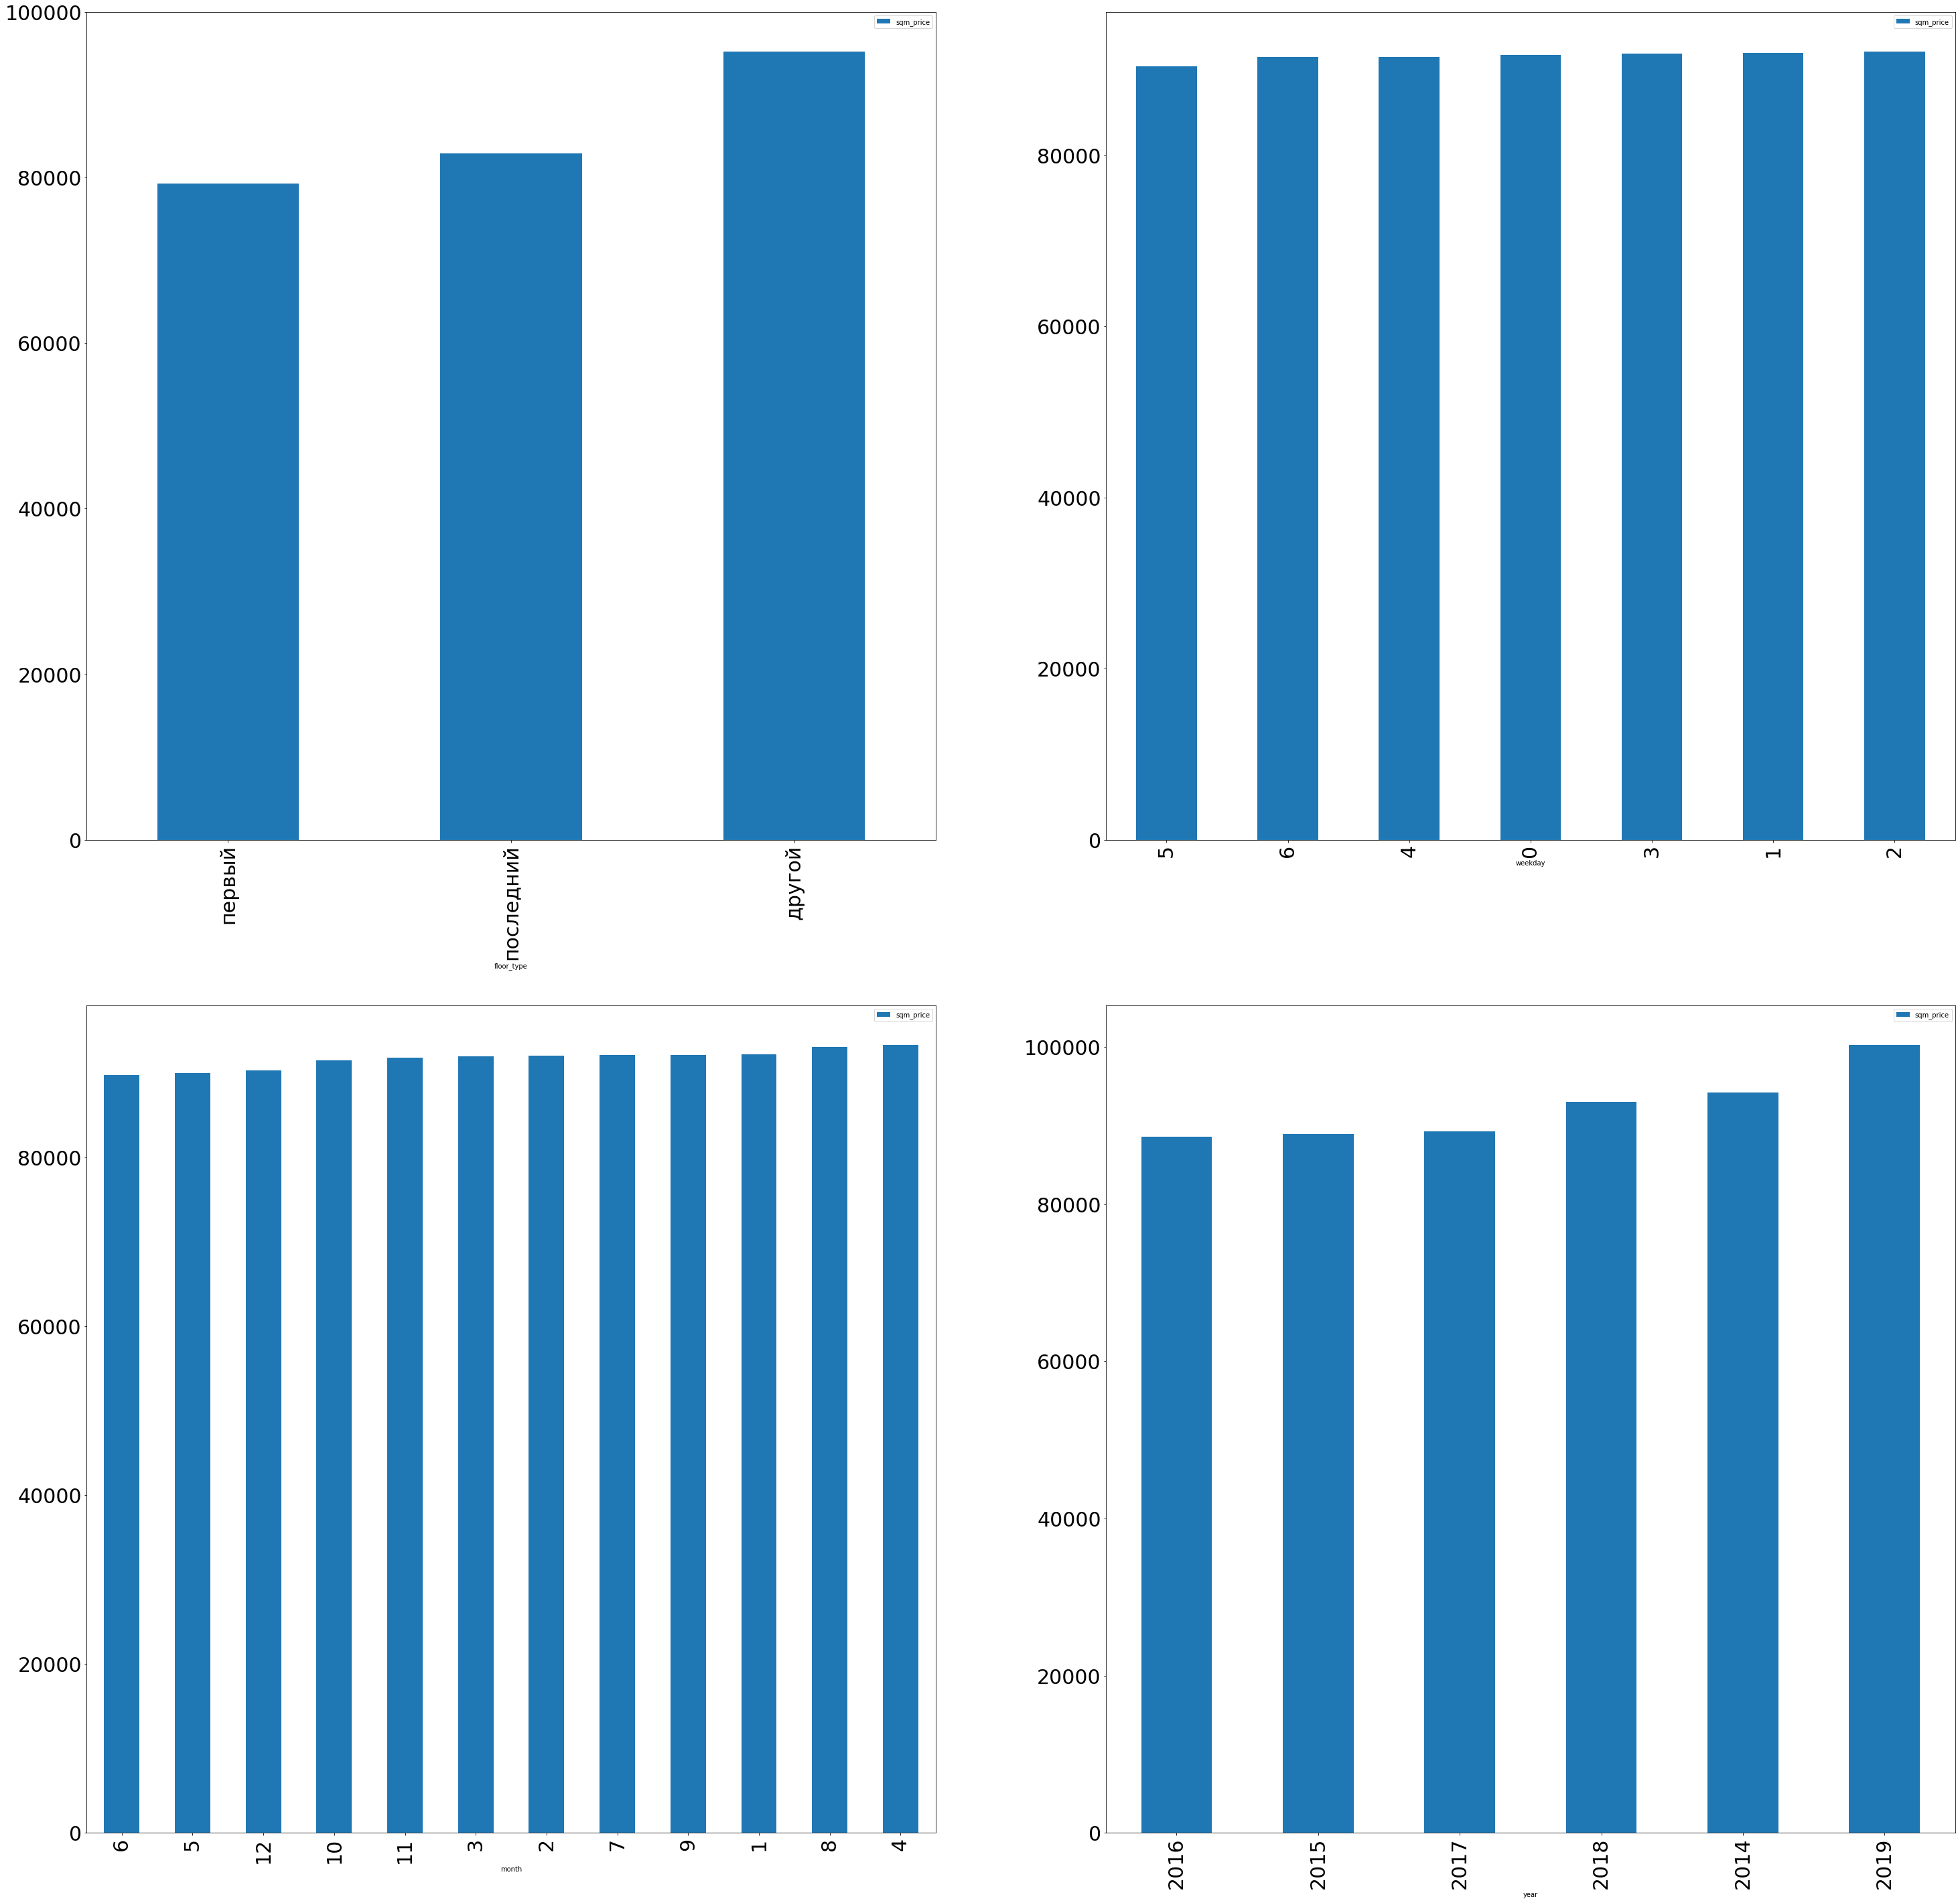

In [43]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,50))
columns = ['floor_type', 'weekday', 'month', 'year']
values='sqm_price'
count=0
for r in range(rows):
    for c in range(cols):
        ax= estate_data.pivot_table(index=columns[count], values='sqm_price', aggfunc='median').sort_values(by=values)
        ax.plot(kind='bar', y=values, ax=axes[r,c],fontsize=30)
        count += 1

Достаточно очевидно:
- цена квадратного метра зависит от расположения квартиры - цена ниже всего для первых этажей и выше для всех кроме последнего. 
- Зависимости от дня и месяца практически нет. 
- По годам -совпадение с "тучными" и "тощими" временами в экономике. Наибольшая цена 2019 -частичная стабилизация, 2014 -до потрясений. 2015-2018 годы обвал национальной валюты, снижение цен на нефть итд.

#### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. 

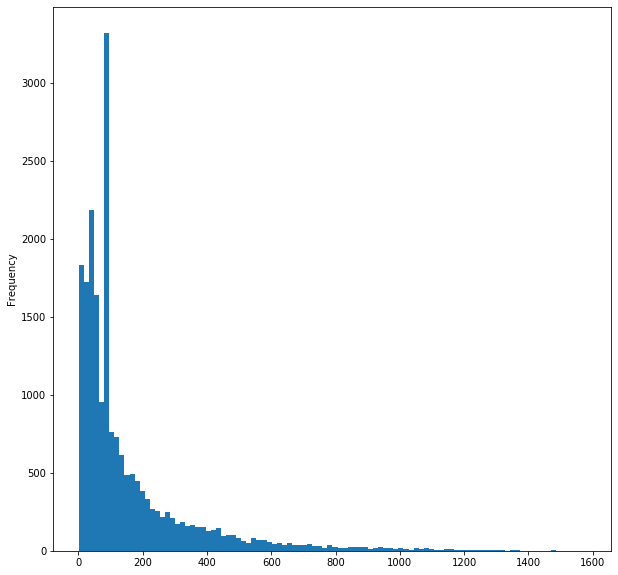

In [44]:
estate_data['days_exposition'].plot(kind='hist',bins=100, figsize=(10,10))

In [45]:
estate_data['days_exposition'].describe()

count    20162.000000
mean       160.074695
std        195.702933
min          1.000000
25%         45.000000
50%         95.000000
75%        188.000000
max       1580.000000
Name: days_exposition, dtype: float64

Исходя из графика и  статистическим характеристикам  - средний срок продажи около полугода(160 дней), при этом 50%квартир продаются за 3 месяца. Объекты, которые не купили в течении полугода могут продаваться до 5 лет.

На гистограммы можно заметить всплески продаж в интервале от 1 до 150 дней

выведем наибольшее число продаж по дням:

In [46]:
estate_data['days_exposition'].value_counts().head(10)

95    2427
45     863
60     513
7      215
30     187
4      154
3      150
5      137
14     132
44     130
Name: days_exposition, dtype: int64

наибольшее количество продаж приходится на 95, 45, 60, 7, 30 дни. 

Это больше похоже не на продажи, а на массовое снятие объявлений по окончании срока экспозиции -неделя, месяц итд.

#### Выберите 10 населённых пунктов с наибольшим числом объявлений. 
Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
Выделите населённые пункты с самой высокой и низкой стоимостью жилья.


In [47]:
top10=estate_data.pivot_table(index='locality_name', values ='sqm_price', aggfunc=['count','mean'])
top10.columns=['amount','mean_M2_price']
top10 = top10.sort_values(by='amount',ascending=False).round().head(10)
top10

,amount,mean_M2_price
locality_name,,
санкт-петербург,12508,104543.0
поселок мурино,550,85604.0
поселок шушары,434,78512.0
всеволожск,388,67038.0
поселок парголово,326,90332.0
колпино,325,75261.0
пушкин,323,100182.0
деревня кудрово,298,92410.0
гатчина,297,68559.0


Самая дорогая недвижимость в СПб, самая дешёвая в Выборге.


Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. 

In [48]:
spb = estate_data.query('locality_name == "санкт-петербург"') 
spb['center_dist']=(spb['cityCenters_nearest']/1000).round()
spb.sample(5)

,",total_images",last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,weekday,month,year,floor_type,sqm_price,living_area_ratio,kitchen_area_ratio,center_dist
22207,"22207,16",9200000,67.9,2018-01-12,2,2.771283,16,34.8,14,False,...,187.0,25,4,1,2018,другой,135493.4,0.51,0.25,7.0
17531,"17531,7",5190000,60.0,2016-05-31,3,2.500000,9,39.0,7,False,...,NaN,36,1,5,2016,другой,86500.0,0.65,0.12,15.0
8402,"8402,1",10200000,96.0,2017-04-11,4,2.771283,6,64.0,6,False,...,505.0,90,1,4,2017,последний,106250.0,0.67,0.17,7.0
17053,"17053,9",4700000,45.5,2018-03-14,2,2.500000,9,28.5,5,False,...,NaN,18,2,3,2018,другой,103296.7,0.63,0.16,17.0
18204,"18204,20",4700000,44.3,2019-04-06,2,2.500000,5,29.7,3,False,...,492.0,95,5,4,2019,другой,106094.8,0.67,0.16,11.0


Посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

посмотрим как зависит средняя цена м2 от расстояния:

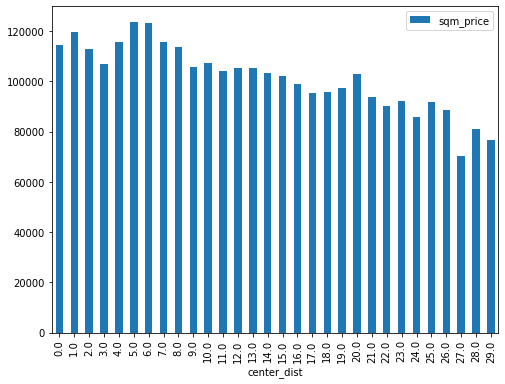

In [49]:
mean_m2=spb.pivot_table(index='center_dist', values='sqm_price', aggfunc='mean')#.sort_values(ascending=True,by='sqm_price')
mean_m2.plot(kind='bar',y='sqm_price',figsize=(8,6))


На графике видно, что средняя цена за М2 резко меняется у объектов расположенных на третьем километре от центра. Надо так же отметить, что в радиусе 6-8 километров цена даже выше чем в самом центре, что косвенно может свидетельствовать о привлекательности таких районов, как, например, Васильевский остров (Петроградская сторона?)

#### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: 
- площадь, цена, число комнат, высота потолков. 
- Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Примем за центральную зону все квартиры находящиеся на расстоянии до 3км от центра. Выбор именно 3х километрового радиуса дополнительно можно подкрепить тем, что скажем диаметр Садового кольца в Москве приблизительно 5км (длина 15,6км/3,14)

In [50]:
spb_center=spb.query('center_dist < = 3.0')
spb_center.shape

(296, 30)

для корректного сопоставления проанализируем параметры квартир в центре тем же способом

In [51]:
spb_prop=spb_center[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116ce67d0>,
      dtype=object)

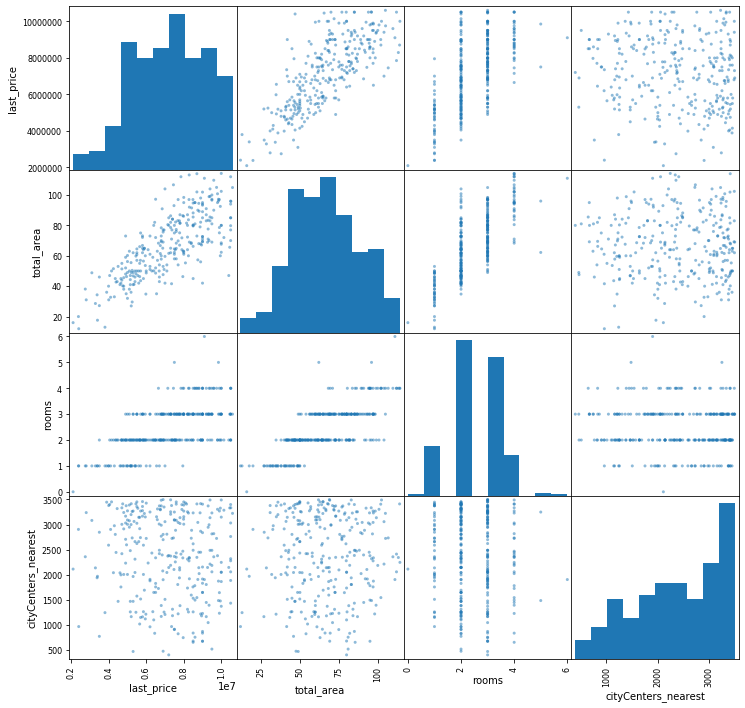

In [52]:
pd.plotting.scatter_matrix(spb_prop, figsize=(12, 12))

Получим типовые параметры квартиры, выставленной на продажу в центре города:


In [53]:
spb_center.describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,...,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,sqm_price,living_area_ratio,kitchen_area_ratio,center_dist
count,2.960000e+02,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,...,296.000000,260.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,7.168601e+06,67.083885,2.462838,2.799262,4.864865,41.498716,2.868243,11.066453,0.070946,22175.662162,...,1.945946,368.846154,204.841216,2.672297,6.537162,2017.084459,111571.148986,0.611081,0.179459,2.246622
std,1.923000e+06,21.181801,0.904960,0.114056,1.129864,16.804317,1.488785,5.046949,0.337037,2221.754926,...,1.094106,258.187952,233.174478,1.825630,3.599242,1.087508,27557.508640,0.119956,0.094408,0.796170
min,2.100000e+06,12.000000,0.000000,2.500000,2.000000,9.000000,1.000000,5.000000,0.000000,18862.000000,...,0.000000,22.000000,3.000000,0.000000,1.000000,2014.000000,63524.600000,0.270000,0.070000,0.000000
25%,5.637500e+06,50.000000,2.000000,2.771283,4.000000,28.975000,2.000000,8.000000,0.000000,20644.000000,...,1.000000,151.000000,60.000000,1.000000,3.000000,2017.000000,92861.900000,0.540000,0.120000,2.000000
50%,7.300000e+06,66.450000,2.000000,2.771283,5.000000,40.200000,3.000000,10.000000,0.000000,21980.500000,...,2.000000,305.500000,97.000000,3.000000,7.000000,2017.000000,106458.350000,0.600000,0.150000,2.000000
75%,8.750000e+06,82.400000,3.000000,2.822500,5.000000,51.425000,4.000000,11.925000,0.000000,23181.000000,...,3.000000,566.000000,275.250000,4.000000,10.000000,2018.000000,125432.075000,0.680000,0.210000,3.000000
max,1.060000e+07,114.200000,6.000000,3.020000,12.000000,101.000000,7.000000,40.200000,4.000000,31729.000000,...,3.000000,1034.000000,1477.000000,6.000000,12.000000,2019.000000,292307.700000,0.930000,0.690000,3.000000


Типичная квартира на продажу в центре:
- площадь 67м2
- 2-3 комнаты
- высота потолка 2,8м
- цена 7,2млн


In [54]:
round(spb_prop.corr()[['last_price']].sort_values('last_price',ascending=False)[1:],2)


,last_price
total_area,0.76
rooms,0.61
cityCenters_nearest,-0.11


Цена недвижимости в центре еще больше зависит от ее общей площади и , соответственно количества комнат. Расстояние до центра практически не оказывает влияния на стоимость, в то время, как в полной выборке это имеет большее значение.

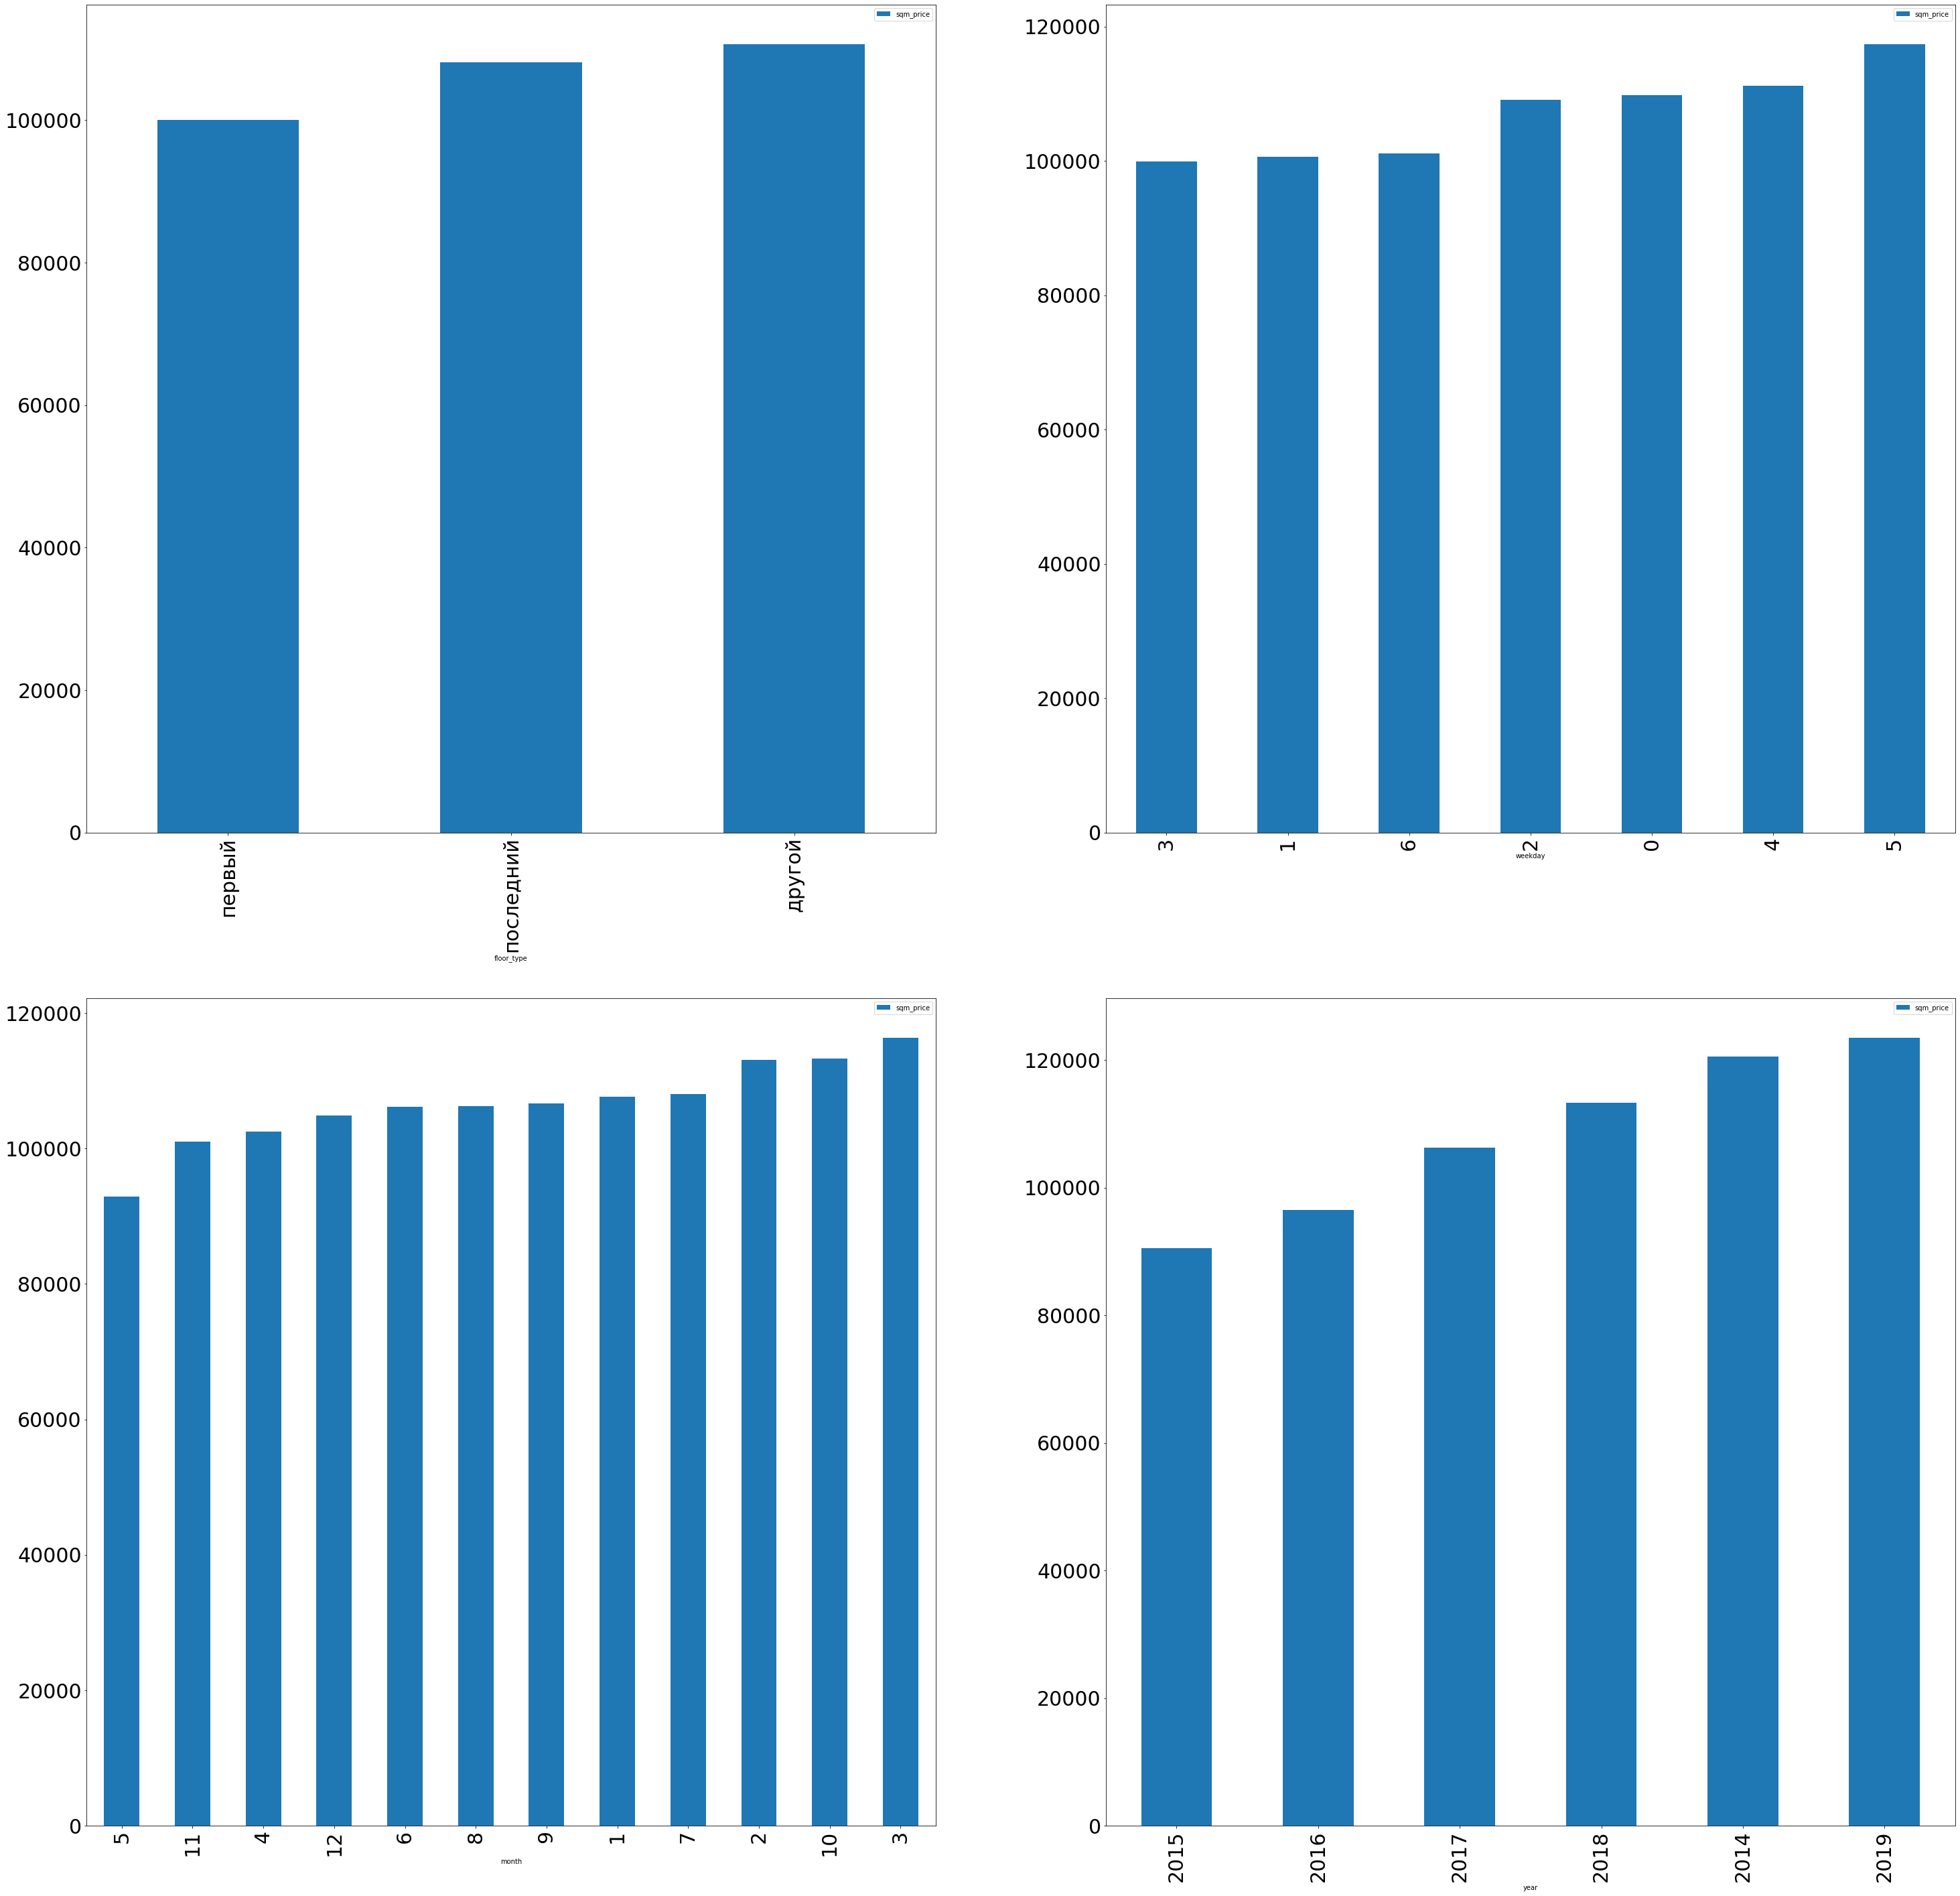

In [55]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,50))
columns = ['floor_type', 'weekday', 'month', 'year']
values='sqm_price'
count=0
for r in range(rows):
    for c in range(cols):
        ax= spb_center.pivot_table(index=columns[count], values='sqm_price', aggfunc='median').sort_values(by=values)
        ax.plot(kind='bar', y=values, ax=axes[r,c],fontsize=30)
        count += 1

Первый этаж в центре котируется меньше остальных, но цена последнего этажа не сильно отличается от "другого"

По годам стоимость объектов подчиняется той же закономерности, что и в полном датасете-цена выше в "стабильные" годы-2014,2019.

Зависимость от дней недели - в объявлениях поданых в пятницу цена выше, чем в остальные дни.Видимо расчет на большее количество просмотров в выходные когда у покупателей больше свободного времени. Из данных по городу и области этого не видно.

Недвижимости оценивается дороже в марте и октябре и дешевле всего в мае.

#### Выводы:

- были обнаружены и удалены аномальные значения и тем самым скорректировали типовые характеристики продаваемых квартир
- изучены зависимости цены квартиры от этажа, расстояния от центра, числа комнат, даты публикация объявления
- из 10 населённых пунктов с самым большим числом объявлений, выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра жилья
- по зависимости изменения цены квартиры от расстояния до центра была выделена центральная зона СПб
- также были определены типовые характеристики квартир в продающихся в центре города. В сравнении с типовыми значениями для всех данных, квартира в центре стоит больше, имеет большую высоту потолков и, в среднем, больше комнат.

#### Общий вывод
Для определения факторов влияющих на рыночною стоимость недвижимости были получены и проанализированны данные архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет:

Проведена предобработка данных:
- заполнены пропущеные значения для необходимых в анализе полей
- добавлены недостающие колонки
- выявлены и удалены аномальные значения

Проведен анализ характеристик квартиры влияющих на ее цену:
- общей площади, числа комнат, расстояния до центра города, этажа, даты публикации обьявления

Показано изменение цены квадратного метра в зависимости от месторасположения(населенного пункта).

Изучены факторы влияющие на цену квартиры в центре города.

Проведено сопоставление типовых характеристик квартир на продажу в центре и во всем городе и области.

Установлено:
- цена недвижимости прямо пропорциональна ее площади. Это справеливо для всех данных и для центра.
- меньшую стоимость имеют квартиры расположенные на первом и последнем этажах.
- месяц и день недели подачи объявления практически не влияют на цену.
- цена недвижимости зависит от макроэкономических факторов (см зависимость цены от года )
- половина всех продаж осуществляется в первые 3 месяца с момента подачи объявления


### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод